# Data Wrangling II

## Setup

<p>For this lab, we will be using the following libraries:</p>
<ul>
    <li><code>skillsnetwork</code> to download the dataset.</li>
    <li><code>pandas</code> for managing the data.</li>
    <li><code>numpy</code> for mathematical operations.</li>
    <li><code>matplotlib</code> for additional plotting tools.</li>
</ul>

### Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os

%matplotlib inline

<p>Download the updated dataset by running the cell below.</p>
<p>The functions below will download the dataset onto your computer.</p>

In [2]:
dir_path = os.path.join(".", "data")
os.makedirs(dir_path, exist_ok=True)

def download_file(url: str) -> str:
    with requests.get(url=url, stream=True) as response:
        response.raise_for_status()

        filepath = os.path.join(dir_path, url.rsplit("/", 1)[-1])
        total_size = int(response.headers.get("Content-Length", 0))
        chunk_size = 1024 ** 2
        download_size = 0

        with open(filepath, "wb") as file:
            for chunk in response.iter_content(chunk_size=chunk_size):
                if not chunk:
                    continue

                file.write(chunk)
                download_size += len(chunk)

                if total_size > 0:
                    progress = (download_size / total_size) * 100
                    print(f"Downloading: {progress:.2f}% ({download_size} / {total_size} bytes)")

    print("Download Complete.")
    return filepath

In [3]:
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

<p>To obtain the dataset, utilize the <code>download_file()</code> function as defined above:</p>

In [4]:
filename = download_file(data_url)

Downloading: 100.00% (12477 / 12477 bytes)
Download Complete.


<p>First we load data into a <code>pandas.DataFrame</code>.</p>

In [5]:
df = pd.read_csv(filename, header=0)

<p>Verify loading by displaying the dataframe summary using <code>dataframe.info</code>.</p>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


<p>View the first 5 values of the updated dataframe using <code>dataframe.head()</code>.</p>

In [7]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


<p>Note that we can update the <code>Screen_Size_cm</code> column such that all values are rounded to nearest 2 decimal places by using <code>numpy.round()</code>.</p>

In [8]:
df[["Screen_Size_cm"]] = np.round(df[["Screen_Size_cm"]], 2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


## Task 1 - Evaluate the dataset for missing data

<p>Missing data was last converted from <code>?</code> to <code>numpy.nan</code>. Pandas uses <b>NaN</b> and <b>Null</b> values interchangeably. This means, you can just identify the entries having <b>Null</b> values. Write a code that identifies which columns have missing data.</p>

In [9]:
missing_data = df.isnull()
missing_data.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
count = 1
for column in missing_data.columns.values.tolist():
    print(f"{count}. {missing_data[column].value_counts()}", end="\n\n")
    count += 1

1. Unnamed: 0
False    238
Name: count, dtype: int64

2. Manufacturer
False    238
Name: count, dtype: int64

3. Category
False    238
Name: count, dtype: int64

4. Screen
False    238
Name: count, dtype: int64

5. GPU
False    238
Name: count, dtype: int64

6. OS
False    238
Name: count, dtype: int64

7. CPU_core
False    238
Name: count, dtype: int64

8. Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

9. CPU_frequency
False    238
Name: count, dtype: int64

10. RAM_GB
False    238
Name: count, dtype: int64

11. Storage_GB_SSD
False    238
Name: count, dtype: int64

12. Weight_kg
False    233
True       5
Name: count, dtype: int64

13. Price
False    238
Name: count, dtype: int64



## Task 2

### Replace with mean

<p>Missing values in attributes that have continuous data are best replaced using Mean value. We note that values in <code>Weight_kg</code> attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.</p>

In [11]:
avg_weight = df["Weight_kg"].astype("float").mean(axis=0)
df["Weight_kg"] = df["Weight_kg"].replace(np.nan, avg_weight)

### Replace with the most frequent value

<p>Missing values in attributes that have categorical data are best replaced using the most frequent value. We note that values in <code>Screen_Size_cm</code> attribute are categorical in nature, and some values are missing. Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute.</p>

In [12]:
common_screen_size = df["Screen_Size_cm"].value_counts().idxmax()
df["Screen_Size_cm"] = df["Screen_Size_cm"].replace(np.nan, common_screen_size)

## Task 3 - Fixing the data types

<p>Both <code>Weight_kg</code> and <code>Screen_Size_cm</code> are seen to have the data type <code>Object</code>, while both of them should be having a data type <code>float</code>.</p>

In [13]:
df[["Weight_kg", "Screen_Size_cm"]] = df[["Weight_kg", "Screen_Size_cm"]].astype("float")

## Task 4

### Data Standardization

<p>The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below-mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.</p>
<pre>1 inch = 2.54 cm<br />1 kg = 2.205 pounds</pre>

In [14]:
df["Weight_kg"] = df["Weight_kg"] * 2.205
df = df.rename(columns={"Weight_kg": "Weight_pounds"})

df["Screen_Size_cm"] = df["Screen_Size_cm"] / 2.54
df = df.rename(columns={"Screen_Size_cm": "Screen_Size_inch"})

### Data Normalization

<p>Often it is required to normalize a continuous data attribute. Write a code to normalize the <code>CPU_frequency</code> attribute with respect to the maximum value available in the dataset.</p>

In [15]:
df["CPU_frequency"] = df["CPU_frequency"] / df["CPU_frequency"].max()

## Task 5 - Binning

<p>Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute <code>Price</code>. These bins would be named <code>Low</code>, <code>Medium</code> and <code>High</code>. The new attribute will be named <code>Price-binned</code>.</p>

In [16]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_name = ["Low", "Medium", "High"]
df["Price-binned"] = pd.cut(df["Price"], bins=bins, labels=group_name, include_lowest=True)

<p>Also, plot the bar graph of these bins.</p>

Text(0.5, 1.0, 'Price Bins')

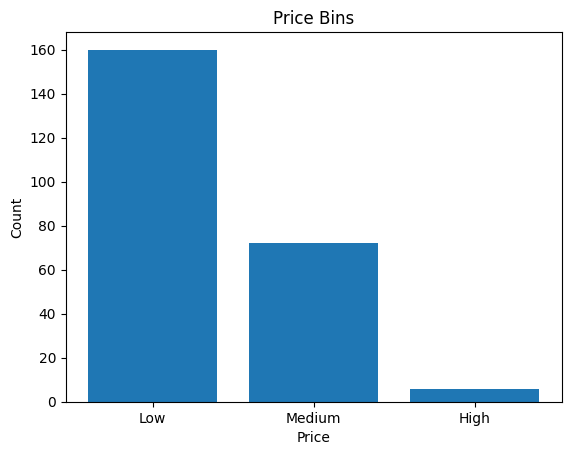

In [17]:
plt.bar(group_name, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Bins")

## Task 6 - Indicator Variables

<p>Convert the <code>Screen</code> attribute of the dataset into 2 indicator variables, <code>Screen-IPS_panel</code> and <code>Screen-Full_HD</code>. Then drop the <code>Screen</code> attribute from the dataset.</p>

In [18]:
dummy_variable = pd.get_dummies(df["Screen"])
dummy_variable = dummy_variable.rename(columns={"IPS Panel": "Screen-IPS_panel", "Full HD": "Screen-Full_HD"})
df = pd.concat([df, dummy_variable], axis=1)

df = df.drop("Screen", axis=1)

<p>This version of the dataset, now finalized, is the one you'll be using in all subsequent modules. Print the content of <code>dataframe.head()</code> to verify the changes that were made to the dataset.</p>

In [19]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


****
This is the end of the file.
****